In [1]:
#importar datos y acomodar
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
#from preproc import *

from preproc_hrs import get_data,rsquare
from forecast_trasformer import forecast_transformer, trainer

#import numpy as np
import torch
from torch import nn
from sklearn.metrics import mean_squared_error

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device {device}")

Using device cuda:0


In [3]:
window_size = 48

In [4]:
yrs1 = ['2012','2013','2014','2015','2016','2017']
x_train,y_train,x_val,y_val,x_test,y_test,scaler_yval = get_data(
    yrs_train=yrs1,
    yr_val='2018',
    yr_test='2019',
    datadir='data_leon2/',
    WINDOW=window_size
    )

In [5]:
x_train = torch.Tensor(x_train)
y_train = torch.Tensor(y_train)
x_val = torch.Tensor(x_val)
y_val = torch.Tensor(y_val)
x_test = torch.Tensor(x_test)
y_test = torch.Tensor(y_test)

In [6]:
train = torch.utils.data.TensorDataset(x_train,y_train)
val = torch.utils.data.TensorDataset(x_val,y_val)
test = torch.utils.data.TensorDataset(x_test,y_test)
train_loader = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val, batch_size=64, shuffle=False)
test_loader = torch.utils.data.DataLoader(test, batch_size=64, shuffle=False)

## MODELO

In [25]:
#model = forecast_transformer(d_input=17,d_model=512,heads=4,num_lys=4,window=window_size,decoder_window=4)
model = forecast_transformer(d_input=17,d_model=64,heads=4,num_lys=4,window=window_size,decoder_window=4)
model = model.to(device)

In [26]:
optimizer = torch.optim.AdamW(model.parameters(),lr=0.0001)
#error = torch.nn.L1Loss()
#error = torch.nn.SmoothL1Loss()
error = torch.nn.MSELoss()

In [27]:
num_epochs = 5

In [28]:
loss_list =  trainer(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    loss_fcn=error,
    num_epochs=num_epochs,
    )

val loss:  tensor(0.0214, device='cuda:0')
saved model
val loss:  tensor(0.0105, device='cuda:0')
saved model
val loss:  tensor(0.0084, device='cuda:0')
saved model
val loss:  tensor(0.0090, device='cuda:0')
val loss:  tensor(0.0050, device='cuda:0')
saved model
val loss:  tensor(0.0059, device='cuda:0')
val loss:  tensor(0.0057, device='cuda:0')
val loss:  tensor(0.0047, device='cuda:0')
saved model
val loss:  tensor(0.0035, device='cuda:0')
saved model
val loss:  tensor(0.0077, device='cuda:0')
epoch:  0
iter:500 loss:0.0053829895332455635
val loss:  tensor(0.0078, device='cuda:0')
val loss:  tensor(0.0063, device='cuda:0')
val loss:  tensor(0.0030, device='cuda:0')
saved model
val loss:  tensor(0.0030, device='cuda:0')
saved model
val loss:  tensor(0.0027, device='cuda:0')
saved model
val loss:  tensor(0.0039, device='cuda:0')
val loss:  tensor(0.0030, device='cuda:0')
val loss:  tensor(0.0032, device='cuda:0')
val loss:  tensor(0.0046, device='cuda:0')
val loss:  tensor(0.0036, dev

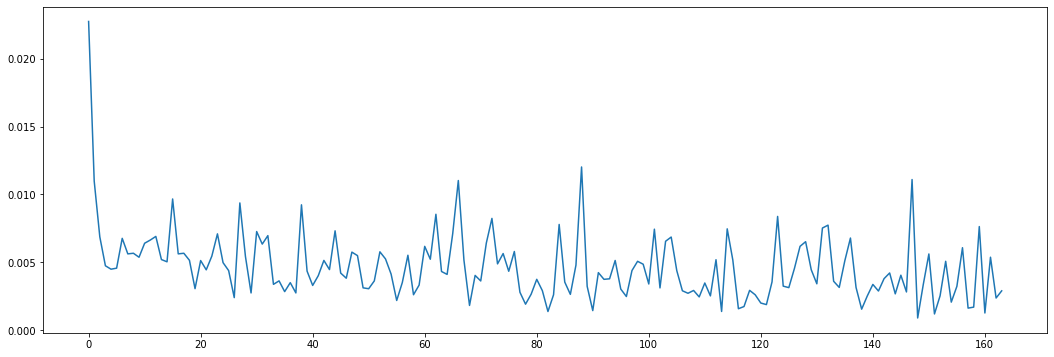

In [ ]:
plt.figure(figsize=(18,6))
plt.plot([x.cpu() for x in loss_list])

# Evaluación

In [ ]:

model = torch.load('saves/checkpoint.pt')
model.eval()

forecast_transformer(
  (embed1): Linear(in_features=17, out_features=128, bias=True)
  (embed2): Linear(in_features=17, out_features=128, bias=True)
  (encode): TransformerEncoderLayer(
    (self_attn): MultiheadAttention(
      (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
    )
    (linear1): Linear(in_features=128, out_features=1024, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
    (linear2): Linear(in_features=1024, out_features=128, bias=True)
    (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
    (norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
    (dropout1): Dropout(p=0.1, inplace=False)
    (dropout2): Dropout(p=0.1, inplace=False)
  )
  (stackedEncoder): TransformerEncoder(
    (layers): ModuleList(
      (0): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
        )
        

In [ ]:
yhat = torch.Tensor(1,1,1).to(device)
with torch.no_grad(): #¿why?
    for x,y in val_loader:
        x =x.to(device)
        y = y.to(device)
        out = model(x).view(-1,1,1)
        yhat = torch.cat((yhat,out), dim=0)
yhat = yhat[1:].view(-1,48).cpu().detach().numpy()
yhat = scaler_yval.inverse_transform(yhat)
y_val_scaled = scaler_yval.inverse_transform(y_val.view(-1,48))

In [ ]:
yhat

array([[ -3.5998898 , -20.08704   ,  -8.63378   , ...,  -3.7473166 ,
         -3.9789555 ,  -4.6320205 ],
       [ -4.8570685 , -11.538052  , -11.173253  , ...,   0.39674956,
         -4.4226604 ,  -5.0531106 ],
       [  0.9169736 ,  -4.3686323 ,  -8.968693  , ...,  -0.6556746 ,
         -0.06144952,   1.8541855 ],
       ...,
       [-15.177575  ,  -7.1306305 , -17.037836  , ...,  -1.5509235 ,
         -1.5875375 ,  -2.154496  ],
       [ -2.1323657 ,   3.193861  ,  -6.8466454 , ...,  -3.3965006 ,
         -1.1185707 ,  -0.88001555],
       [ -6.101762  ,   1.1625084 ,  -8.372283  , ...,  -6.822659  ,
         -6.346169  ,  -4.59753   ]], dtype=float32)

No handles with labels found to put in legend.


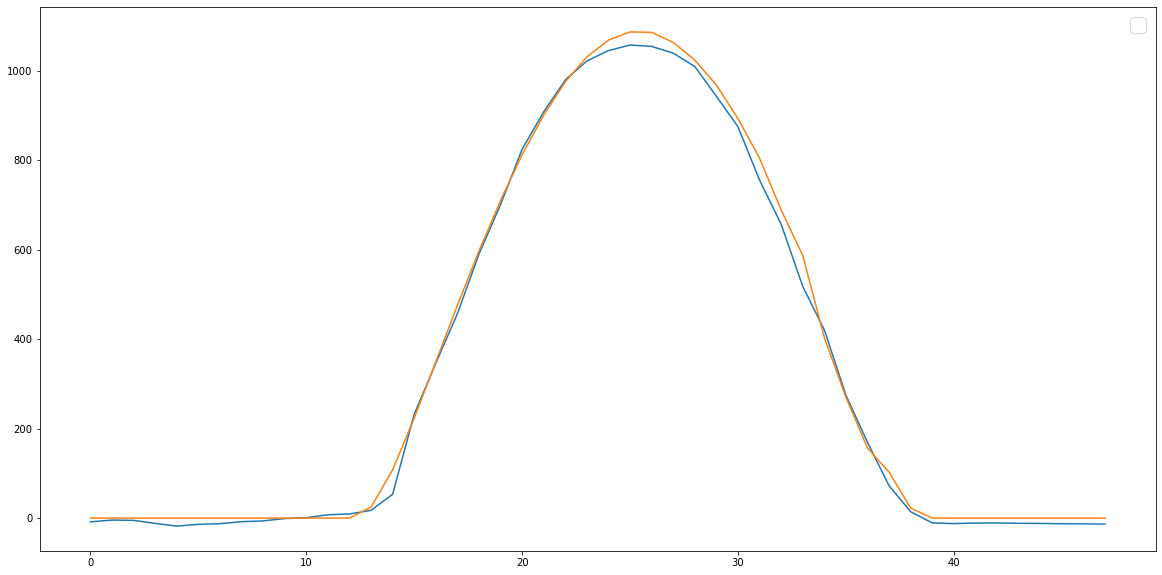

In [ ]:
day = 117
plt.figure(figsize=(20,10))
plt.plot(yhat[day])
plt.plot(y_val_scaled[day])
plt.legend(prop={'size': 20})

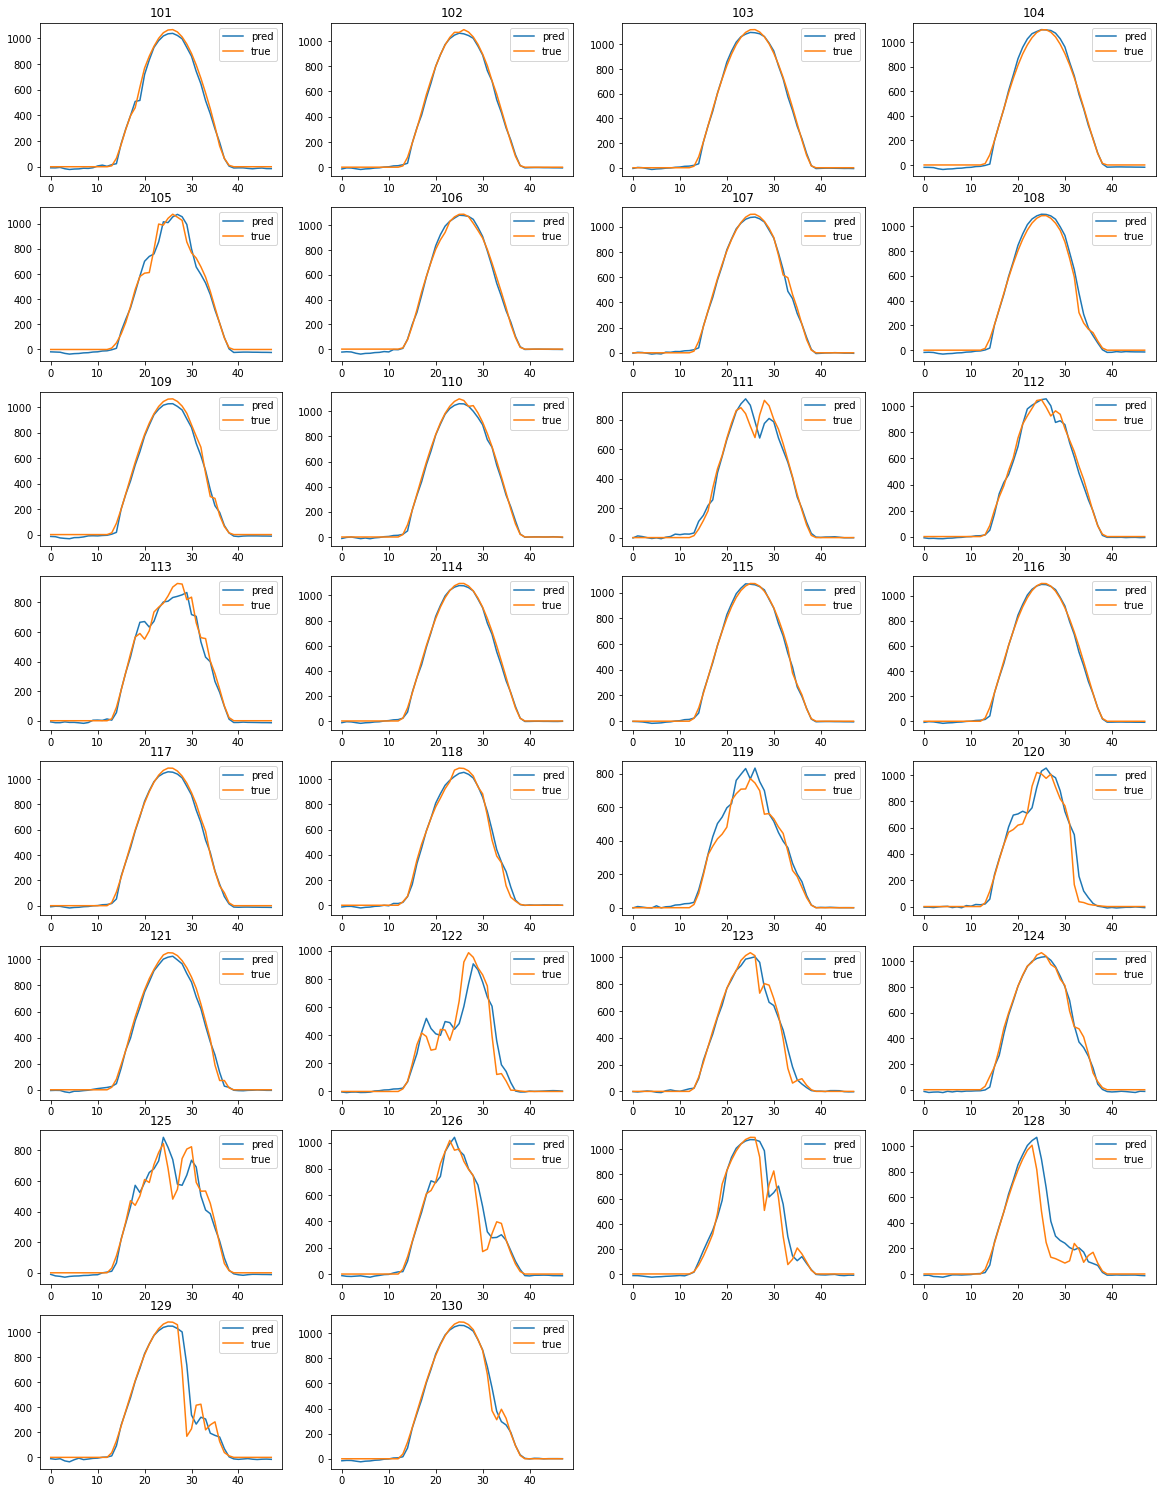

In [ ]:
day0 = 100
plt.figure(figsize=(20,30))
for j in range(1,31):
    plt.subplot(9,4,j)
    plt.plot(yhat[j+day0],label='pred')
    plt.plot(y_val_scaled[j+day0],label = 'true')
    plt.title(str(j+day0))
    plt.legend()

In [24]:
#checa el mse HORAS
import math
testRMS = math.sqrt(mean_squared_error(y_val_scaled, yhat))
testR2 =rsquare(y_val_scaled, yhat)
print('Test Score: %.2f RMSE' % (testRMS))
print('Test Score:', testR2,' R2')

Test Score: 52.17 RMSE
Test Score: 0.9769848178278884  R2
